In [56]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [57]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()

This is how maze looks like:

□ □ □ □ □
□ □ □ X □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [58]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover chi
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg200 = XNCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200)

XNCScfg20 = XNCSConfig(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200)


In [59]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 3
explore = 2000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit,
             pre_generate=True
           )

df20 = XNCSExp(maze=maze,
                   cfg=XNCScfg20,
                   number_of_tests=number_of_experiments,
                   explore_trials=0,
                   exploit_trials=exploit+explore,
                   pre_generate=True)

df200 = XNCSExp(maze=maze,
                   cfg=XNCScfg200,
                   number_of_tests=number_of_experiments,
                   explore_trials=0,
                   exploit_trials=exploit+explore,
                   pre_generate=True)



Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 29, 'reward': 1000.0, 'perf_time': 0.29741850000027625, 'population': 1633, 'numerosity': 1800, 'average_specificity': 8.299444444444445}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 20, 'reward': 1001.0596745660605, 'perf_time': 0.29211729999951785, 'population': 1165, 'numerosity': 1800, 'average_specificity': 7.827222222222222}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 13, 'reward': 1011.8642499190946, 'perf_time': 0.15623279999999795, 'population': 788, 'numerosity': 1800, 'average_specificity': 6.928888888888889}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1, 'reward': 1964.3092661652215, 'perf_time': 0.002553000000261818, 'population': 496, 'numerosity': 1800, 'average_specificity': 8.965555555555556}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 23, 'reward': 1000.475641795266, 'perf_time': 0.2056257000003825, 'population': 625, 'numerosity': 1800, 'average_specificity': 10.7011111111

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 46, 'reward': 1000.0, 'perf_time': 0.5420477999996365, 'population': 1633, 'numerosity': 1800, 'average_specificity': 8.15611111111111}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 8, 'reward': 1066.6814270769698, 'perf_time': 0.10962620000100287, 'population': 1170, 'numerosity': 1800, 'average_specificity': 8.178333333333333}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 17, 'reward': 1002.9606962067608, 'perf_time': 0.19298209999942628, 'population': 853, 'numerosity': 1800, 'average_specificity': 9.003333333333334}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1, 'reward': 2163.5588558780846, 'perf_time': 0.007484700001441524, 'population': 563, 'numerosity': 1800, 'average_specificity': 10.307777777777778}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 25, 'reward': 1000.203830151621, 'perf_time': 0.16013950000160548, 'population': 637, 'numerosity': 1800, 'average_specificity': 11.41944444444

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 10, 'reward': 1000.0, 'perf_time': 0.07047460000103456, 'population': 1620, 'numerosity': 1800, 'average_specificity': 8.85388888888889}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 10, 'reward': 1044.5959919382378, 'perf_time': 0.12261690000013914, 'population': 1117, 'numerosity': 1800, 'average_specificity': 8.572777777777778}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 5, 'reward': 1318.481438268665, 'perf_time': 0.07865309999942838, 'population': 874, 'numerosity': 1800, 'average_specificity': 8.812222222222223}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1, 'reward': 2215.768574419425, 'perf_time': 0.0031696000005467795, 'population': 612, 'numerosity': 1800, 'average_specificity': 12.087222222222222}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 14, 'reward': 1009.3406434982348, 'perf_time': 0.09542620000138413, 'population': 676, 'numerosity': 1800, 'average_specificity': 10.5938888888

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 42, 'reward': 1000.0, 'perf_time': 0.6637178000000858, 'numerosity': 1800, 'population': 1621, 'average_specificity': 8.042222222222222, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 2, 'reward': 1539.6079016012468, 'perf_time': 0.01907050000045274, 'numerosity': 1800, 'population': 1551, 'average_specificity': 8.012777777777778, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 19, 'reward': 1002.7614331710533, 'perf_time': 0.24560310000015306, 'numerosity': 1800, 'population': 1480, 'average_specificity': 10.789444444444445, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 5, 'reward': 1000.0, 'perf_time': 0.09091199999966193, 'numerosity': 1800, 'population': 1471, 'average_specificity': 11.530555555555555, 'fraction_accuracy': 0.010416666666666666}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 2, 'reward': 1536.652435510099

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 7, 'reward': 1000.0, 'perf_time': 0.07774679999965883, 'numerosity': 1800, 'population': 1623, 'average_specificity': 7.937777777777778, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1250.772974287232, 'perf_time': 0.07821940000030736, 'numerosity': 1800, 'population': 1523, 'average_specificity': 9.074444444444444, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 2, 'reward': 1934.1716571154643, 'perf_time': 0.02155240000138292, 'numerosity': 1800, 'population': 1509, 'average_specificity': 10.061111111111112, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1552.8246229518845, 'perf_time': 0.03261740000016289, 'numerosity': 1800, 'population': 1431, 'average_specificity': 9.766666666666667, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 4, 'reward': 1394.0961085056447, 'perf

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 7, 'reward': 1000.0, 'perf_time': 0.08381019999978889, 'numerosity': 1800, 'population': 1645, 'average_specificity': 8.306666666666667, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 2, 'reward': 1554.538037905322, 'perf_time': 0.031449799998881645, 'numerosity': 1800, 'population': 1559, 'average_specificity': 8.694444444444445, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 3, 'reward': 1357.911, 'perf_time': 0.03142599999955564, 'numerosity': 1800, 'population': 1469, 'average_specificity': 9.920555555555556, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 1, 'reward': 1967.8809483116472, 'perf_time': 0.01065310000012687, 'numerosity': 1800, 'population': 1385, 'average_specificity': 11.25388888888889, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 2, 'reward': 1688.9133073824305, 'perf_time': 0.

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 7, 'reward': 1000.0, 'perf_time': 0.08056349999969825, 'numerosity': 1800, 'population': 1648, 'average_specificity': 8.120555555555555, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 1, 'reward': 2147.572630971693, 'perf_time': 0.011285599999609985, 'numerosity': 1800, 'population': 1548, 'average_specificity': 8.926111111111112, 'fraction_accuracy': 0.0661764705882353}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 4, 'reward': 1258.2067397458272, 'perf_time': 0.08567880000009609, 'numerosity': 1800, 'population': 1385, 'average_specificity': 11.08, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1406.1693245266767, 'perf_time': 0.029890999998315237, 'numerosity': 1800, 'population': 1393, 'average_specificity': 12.987777777777778, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 50, 'reward': 4.307519645736986e-

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 4, 'reward': 1000.0, 'perf_time': 0.04397149999931571, 'numerosity': 1800, 'population': 1609, 'average_specificity': 7.887777777777778, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1387.7101301237776, 'perf_time': 0.05126579999887326, 'numerosity': 1800, 'population': 1511, 'average_specificity': 7.89, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 50, 'reward': 3.6552529472225244e-05, 'perf_time': 0.5082492999990791, 'numerosity': 1800, 'population': 1420, 'average_specificity': 9.963333333333333, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 6, 'reward': 1184.4409964972062, 'perf_time': 0.13448009999956412, 'numerosity': 1800, 'population': 1391, 'average_specificity': 11.857777777777779, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 10, 'reward': 1035.071210895838, 'perf_time': 

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 47, 'reward': 1000.0, 'perf_time': 0.7698165000001609, 'numerosity': 1800, 'population': 1599, 'average_specificity': 8.565555555555555, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1252.6132552735291, 'perf_time': 0.07884560000093188, 'numerosity': 1800, 'population': 1510, 'average_specificity': 9.396666666666667, 'fraction_accuracy': 0.09090909090909091}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 11, 'reward': 1027.5963186438519, 'perf_time': 0.16514269999970566, 'numerosity': 1800, 'population': 1448, 'average_specificity': 10.835, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 50, 'reward': 4.3023224886070416e-05, 'perf_time': 0.6712955000002694, 'numerosity': 1800, 'population': 1401, 'average_specificity': 12.098888888888888, 'fraction_accuracy': 0.04861111111111111}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 3, 'reward'

In [67]:
df['steps_in_trial_20']=df20['steps_in_trial']
df['population_20']=df20['population']
df['numerosity_20']=df20['numerosity']
df['average_specificity_20']=df20['average_specificity']
df['fraction_accuracy_20']=df20['fraction_accuracy']

df['steps_in_trial_200']=df200['steps_in_trial']
df['population_200']=df200['population']
df['numerosity_200']=df200['numerosity']
df['average_specificity_200']=df200['average_specificity']
df['fraction_accuracy_200']=df200['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_20,population_20,numerosity_20,average_specificity_20,fraction_accuracy_20,steps_in_trial_200,population_200,numerosity_200,average_specificity_200,fraction_accuracy_200
trial,,,,,,,,,,,,,,,,
0,28.333333,1000.000000,0.303314,1628.666667,1800.0,8.436481,18.666667,1629.666667,1800.0,8.095556,0.000000,19.333333,1618.666667,1800.0,8.191296,0.000000
100,3.000000,1474.493164,0.035675,1381.333333,1800.0,7.867222,3.666667,1573.000000,1800.0,7.994815,0.000000,18.333333,1539.000000,1800.0,8.934259,0.040404
200,12.666667,1037.445698,0.174787,1150.666667,1800.0,8.192778,3.000000,1544.333333,1800.0,8.593889,0.000000,3.666667,1523.000000,1800.0,8.737593,0.052362
300,1.666667,1678.847702,0.015831,943.000000,1800.0,9.093519,18.333333,1523.333333,1800.0,9.096667,0.000000,18.333333,1495.333333,1800.0,9.097963,0.022059
400,11.666667,1111.102128,0.142623,838.333333,1800.0,8.248148,3.333333,1513.000000,1800.0,9.736111,0.000000,22.666667,1452.000000,1800.0,10.770741,0.000887
500,9.666667,1121.731972,0.081363,628.666667,1800.0,10.496852,8.000000,1486.000000,1800.0,10.257037,0.000000,21.666667,1417.666667,1800.0,10.626111,0.000000
600,1.000000,2114.545565,0.004402,557.000000,1800.0,10.453519,17.666667,1453.666667,1800.0,10.242778,0.003472,13.333333,1393.666667,1800.0,11.643148,0.017157
700,20.666667,905.510713,0.160681,604.000000,1800.0,10.541296,3.000000,1429.000000,1800.0,10.850370,0.003472,19.666667,1395.000000,1800.0,12.314815,0.016204
800,20.666667,1003.340038,0.153730,646.000000,1800.0,10.904815,6.666667,1428.333333,1800.0,11.551111,0.019213,2.333333,1380.333333,1800.0,12.231667,0.014583


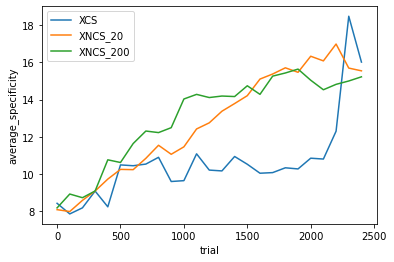

In [68]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_20","average_specificity_200"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS_20","XNCS_200"])

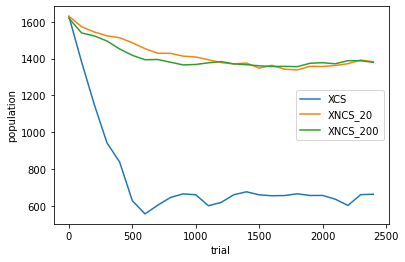

In [69]:
ax = df[['population', "population_20", "population_200"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS_20","XNCS_200"])

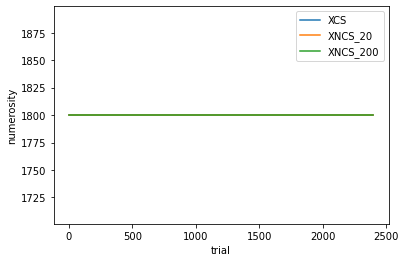

In [70]:
ax = df[['numerosity', 'numerosity_20', 'numerosity_200']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["XCS","XNCS_20","XNCS_200"])

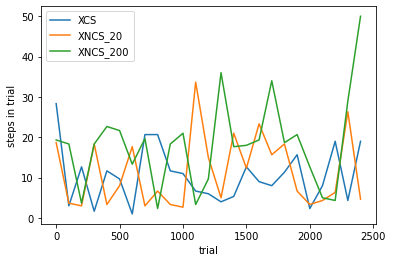

In [71]:
ax = df[['steps_in_trial', 'steps_in_trial_20', 'steps_in_trial_200']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS_20","XNCS_200"])

In [72]:
print(sum(df['steps_in_trial'])/number_of_experiments)
print(sum(df['steps_in_trial_20'])/number_of_experiments)
print(sum(df['steps_in_trial_200'])/number_of_experiments)

87.77777777777779
94.77777777777779
152.33333333333334
